# Importing libraries

In [1]:
import pandas as pd
import os
import glob
import re
import string
import numpy as np
import scipy.sparse
from tensorflow import keras
import seaborn as sns

In [2]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashwi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import VotingClassifier

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Extracting data from each folders which contain .txt files

In [7]:
dataframe = pd.read_csv('bbc-text.csv')
#we are using the head function to print the first 5 rows
dataframe.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [8]:
dataframe.info

<bound method DataFrame.info of            category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]>

In [9]:
columns_titles = ["text","category"]
dataframe2 = dataframe.reindex(columns=columns_titles)


In [10]:
dataframe2.head()

,text,category
0,tv future in the hands of viewers with home th...,tech
1,worldcom boss left books alone former worldc...,business
2,tigers wary of farrell gamble leicester say ...,sport
3,yeading face newcastle in fa cup premiership s...,sport
4,ocean s twelve raids box office ocean s twelve...,entertainment


In [11]:
df = dataframe2.rename(columns={'text': 'Articles', 'category': 'Categories'})
df.head()

,Articles,Categories
0,tv future in the hands of viewers with home th...,tech
1,worldcom boss left books alone former worldc...,business
2,tigers wary of farrell gamble leicester say ...,sport
3,yeading face newcastle in fa cup premiership s...,sport
4,ocean s twelve raids box office ocean s twelve...,entertainment


<AxesSubplot:>

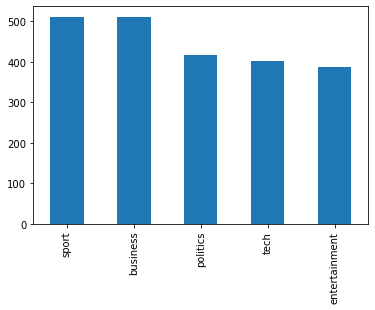

In [12]:
df.Categories.value_counts().plot(kind='bar')

# Creating data frame of the data which we recieved after extraction.

In [13]:

# we can now convert the data categories & articles list into a dataframe.
Y=df['Categories']#extracting the Categories column into a variable for later use.
df

,Articles,Categories
0,tv future in the hands of viewers with home th...,tech
1,worldcom boss left books alone former worldc...,business
2,tigers wary of farrell gamble leicester say ...,sport
3,yeading face newcastle in fa cup premiership s...,sport
4,ocean s twelve raids box office ocean s twelve...,entertainment
...,...,...
2220,cars pull down us retail figures us retail sal...,business
2221,kilroy unveils immigration policy ex-chatshow ...,politics
2222,rem announce new glasgow concert us band rem h...,entertainment
2223,how political squabbles snowball it s become c...,politics


In [14]:
df.info()#checking the null-values = no null values
Y=pd.DataFrame(Y)
Y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Articles    2225 non-null   object
 1   Categories  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


,Categories
0,tech
1,business
2,sport
3,sport
4,entertainment
...,...
2220,business
2221,politics
2222,entertainment
2223,politics


# Data preprocessing(removing all the unnecessary characters from the data)

In [15]:

def cleanText(text):
  stemmer = WordNetLemmatizer()#creating an object of WordNetLemmatizer
  text=text.lower()#convertin the text into lowercase
  text=re.sub('\[.*?\]','',text)#remove text in square brackets
  text=re.sub('[%s]' % re.escape(string.punctuation),'',text)#remove punctuation markes
  text=re.sub('\w*\d\w*','',text) #remove digits or digits which is surrounded by texts
  text=re.sub('\[''""...]','',text)#remove quotation marks
  text=re.sub('\n','',text)#remove \n if any
  text= text.split()#split words
  text = [stemmer.lemmatize(word) for word in text]#from each text a single word is taken and on that word lemmatiztion is performed and stored back to text
  text = ' '.join(text)# adds space to the words
  return text

In [16]:
cleandata=pd.DataFrame(df.Articles.apply(lambda x: cleanText(x)))#CleanText function is applied to every single row of Article column inside the data frame
cleandata['Categories']=Y['Categories']#merging the article and Categories columns to gather.
cleandata

,Articles,Categories
0,tv future in the hand of viewer with home thea...,tech
1,worldcom bos left book alone former worldcom b...,business
2,tiger wary of farrell gamble leicester say the...,sport
3,yeading face newcastle in fa cup premiership s...,sport
4,ocean s twelve raid box office ocean s twelve ...,entertainment
...,...,...
2220,car pull down u retail figure u retail sale fe...,business
2221,kilroy unveils immigration policy exchatshow h...,politics
2222,rem announce new glasgow concert u band rem ha...,entertainment
2223,how political squabble snowball it s become co...,politics


In [17]:
cleandata.Articles

0       tv future in the hand of viewer with home thea...
1       worldcom bos left book alone former worldcom b...
2       tiger wary of farrell gamble leicester say the...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raid box office ocean s twelve ...
                              ...                        
2220    car pull down u retail figure u retail sale fe...
2221    kilroy unveils immigration policy exchatshow h...
2222    rem announce new glasgow concert u band rem ha...
2223    how political squabble snowball it s become co...
2224    souness delight at euro progress bos graeme so...
Name: Articles, Length: 2225, dtype: object

# 1.Feature engineering - Count vectorizer
Now, converting the data into document term metix through count vectorizer

In [18]:
from pandas.core.frame import DataFrame
cv=CountVectorizer(stop_words='english')
Xcv=cv.fit_transform(cleandata.Articles).toarray()
Xcv=pd.DataFrame(Xcv,columns=cv.get_feature_names_out())
Xcv.head()

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aan,aara,aarhus,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2.Feature engineering - TFIDF 
Now, using second feature Tfidf

In [19]:
tfidfv=TfidfVectorizer(stop_words='english')
Xtfidf=tfidfv.fit_transform(cleandata.Articles)
Xtfidf

<2225x26914 sparse matrix of type '<class 'numpy.float64'>'
	with 300141 stored elements in Compressed Sparse Row format>

#3. Feature engineering - Ngram

In [20]:
cvngram=TfidfVectorizer(min_df=7,ngram_range=(2,2))
X=cvngram.fit_transform(cleandata.Articles)
X

<2225x14272 sparse matrix of type '<class 'numpy.float64'>'
	with 300646 stored elements in Compressed Sparse Row format>

#Combining all the three features

In [21]:
features=FeatureUnion([('tfidfv',tfidfv),('cv',cv),('cvngram',cvngram)])
X=features.fit_transform(cleandata.Articles)
X1=SelectKBest(score_func=f_classif,k= 3000).fit_transform(X,Y)


C:\Users\ashwi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Kfold 

In [22]:
kf=KFold(n_splits=5,random_state=42, shuffle=True)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

#Model selection Dictionary

In [23]:
modelselection={
  'SupportVectorMachine': {
  'model': svm.SVC(gamma='auto',random_state=42),
  'params':{
    'C':[1,5,10,20],
    'kernel':['rbf','linear']
    }
  },
   'RandomForsetClassifier': {
  'model': RandomForestClassifier(random_state=42),
  'params':{
    'n_estimators':[20,50,60]
    }
  },
  'LogisticRegression': {
  'model': LogisticRegression(solver='liblinear',multi_class='auto',random_state=42),
  'params':{
    'C':[5,10,20]
    }
  },
  'NaiveBayes-Multimonial':{
  'model':MultinomialNB(),
  'params':{
    }
  },
  'NaiveBayes-Bernoulli': {
  'model': BernoulliNB(),
  'params':{

    }
  },
 'VotingClassifier': {
  'model': VotingClassifier(
      estimators=[('lr',LogisticRegression(solver='liblinear',multi_class='auto',random_state=42)),('rfc',RandomForestClassifier(random_state=42)),('svm',svm.SVC(gamma='auto',random_state=42)),('nbm',MultinomialNB()),('nbb',BernoulliNB())],
      voting='hard'
  ),
  'params':{

    }
  },
  
}


In [25]:
score=[]
for train, test in kf.split(X1):
  Xtrain,Xtest,Ytrain,Ytest=X1[train],X1[test],cleandata.Categories[train], cleandata.Categories[test]
  for modelname, mp in modelselection.items():
    clf=GridSearchCV(mp['model'],mp['params'],return_train_score=False)
    clf.fit(Xtrain,Ytrain)
    score.append({
      'model':modelname,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
    })
  print('number of iterations')
  print('--------------------')

number of iterations
--------------------
number of iterations
--------------------
number of iterations
--------------------
number of iterations
--------------------
number of iterations
--------------------


In [26]:
pd.DataFrame(score)

,model,best_score,best_params
0,SupportVectorMachine,0.968539,"{'C': 10, 'kernel': 'rbf'}"
1,RandomForsetClassifier,0.959551,{'n_estimators': 60}
2,LogisticRegression,0.975281,{'C': 5}
3,NaiveBayes-Multimonial,0.973034,{}
4,NaiveBayes-Bernoulli,0.967978,{}
5,VotingClassifier,0.979213,{}
6,SupportVectorMachine,0.964607,"{'C': 5, 'kernel': 'rbf'}"
7,RandomForsetClassifier,0.957303,{'n_estimators': 60}
8,LogisticRegression,0.969663,{'C': 5}
9,NaiveBayes-Multimonial,0.970787,{}


# CrossValidation

In [27]:
values=[]
accuracy=[]
classi=[]
recall=[]
precision=[]
f1=[]
vc=VotingClassifier(estimators=[('lr',LogisticRegression(solver='liblinear',multi_class='auto',random_state=42)),('rfc',RandomForestClassifier(random_state=42)),('svm',svm.SVC(gamma='auto',random_state=42)),('nbm',MultinomialNB()),('nbb',BernoulliNB())],
     voting='hard')
totalscore=0
for train, test in kf.split(X1):
  Xtrain,Xtest,Ytrain,Ytest=X1[train],X1[test],cleandata.Categories[train], cleandata.Categories[test]
  vc.fit(Xtrain,Ytrain)
  predictedvalues=vc.predict(Xtest)
  values.append(predictedvalues)
  score=accuracy_score(Ytest,predictedvalues)
  recallvar=recall_score(Ytest,predictedvalues,average='macro')
  recall.append(recallvar)
  prevar=precision_score(Ytest,predictedvalues,average='macro')
  precision.append(prevar)
  accuracy.append(score)
  f1.append(f1_score(Ytest,predictedvalues,average='macro'))
print('The accuracy is ',np.mean(accuracy))
print('The macro average precision is ',np.mean(precision))
print('The macro average recall is ',np.mean(recall))
print('The macro average f1-score is ',np.mean(f1))

The accuracy is  0.9725842696629213
The macro average precision is  0.9726310634441191
The macro average recall is  0.9710474797659518
The macro average f1-score is  0.9716654670914592
